In [95]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [96]:
# Read raw data
df = pd.read_csv('SentiNews.csv')
# df.hist()
# Drop the neutral sentiment
df = df[df['sentiment'] != 'neutral']
# Drop missing values
df.dropna(inplace=True)
# Take random sample to check if everything is as expected
df = df.astype("string")
df.sample(frac= 0.01)

,content,sentiment
28106,"Komisija je ugotovila, da v postopku priprave ...",negative
118359,Ne verjamemo nikomur,negative
111357,Kadrovska gneča v energetskem bazenu,negative
111967,Sezona tako ne bo tako uspešna kot bi lahko bila.,negative
45836,Pozitivno vzdušje vlada tudi na ameriškem Wall...,positive
...,...,...
45019,Osrednja indeksa v Parizu in Frankfurtu sta iz...,negative
6722,Največja opozicijska stranka SDS je ministru z...,negative
142985,"Hkrati je dopustil možnost, da dolg zaradi izj...",negative
142161,"Brezplačno v Kopru, Luciji",positive


<Axes: >

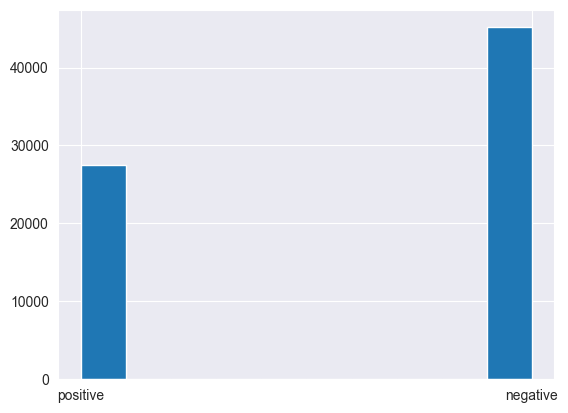

In [97]:
df['sentiment'].hist()

In [98]:
# Initialize Term Frequency - Inverse document frequency vectorizer with maximum features of 5000
# 5000 is a lot, but it apparently improves the performance of the model quite a bit
# https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/
tfidf = TfidfVectorizer(max_features=5000)

In [99]:
# Fit and transform
X = tfidf.fit_transform(df['content']).toarray()

In [100]:
# Check the shape of the vectorized df -> Expect (len(df), 5000)
X.shape

(72661, 5000)

In [101]:
# Labels Series
y = df.iloc[:,-1].values
y

<StringArray>
['positive', 'positive', 'positive', 'positive', 'positive', 'negative',
 'positive', 'negative', 'negative', 'negative',
 ...
 'positive', 'positive', 'positive', 'negative', 'negative', 'positive',
 'positive', 'negative', 'negative', 'positive']
Length: 72661, dtype: string

In [102]:
y.shape

(72661,)

In [103]:
# Do a train/test split with test size of 20% and random seed of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Initialize both a multinomial naive bayes and Bernoulli naive bayes
# https://iq.opengenus.org/bernoulli-naive-bayes/
mnb = MultinomialNB()
bnb = BernoulliNB()

In [105]:
# Fit a multinomial Bayes
mnb.fit(X_train, y_train)
# Perform classification on an array of test vectors X. -> Returns predictions
y_pred_mnb = mnb.predict(X_test)

In [106]:
# Fit a Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
# Perform classification on an array of test vectors X. -> Returns predictions
y_pred_bnb = bnb.predict(X_test)

In [107]:
# Print accuracy scores for both models
print("Multinomial", accuracy_score(y_test, y_pred_mnb))
print("Bernoulli", accuracy_score(y_test, y_pred_bnb))

Multinomial 0.7590999793573248
Bernoulli 0.754008119452281


In [108]:
# Create a confusion matrix for Multinomial Naive Bayes
p_train_mnb =mnb.predict(X_train)
mnb_cm = confusion_matrix(y_train, p_train_mnb, normalize='true')

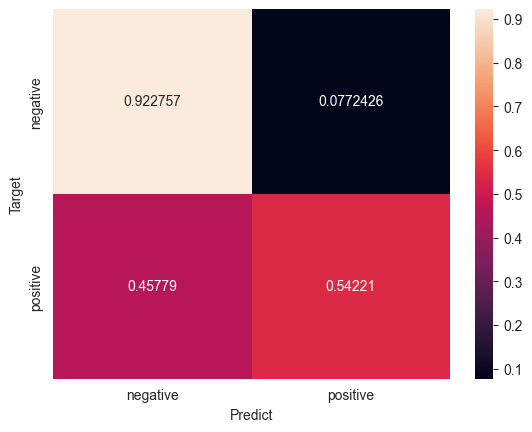

In [109]:
# Plot matrices with SeaBorn
def plot_cm(cm):
    classes = ['negative', 'positive']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sns.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel('Predict')
    ax.set_ylabel('Target')
# Plot a MNB confusion matrix
plot_cm(mnb_cm)
# Strong negative bias

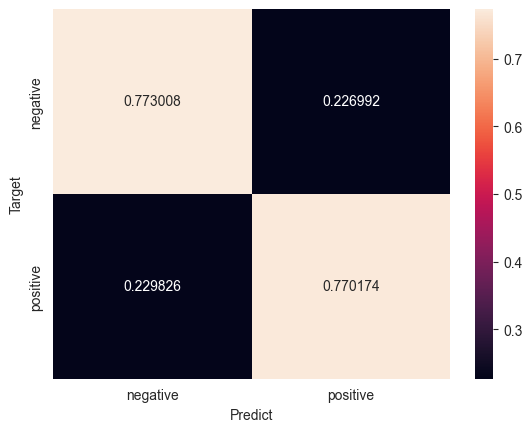

In [110]:
p_train_bnb =bnb.predict(X_train)
bnb_cm = confusion_matrix(y_train, p_train_bnb, normalize='true')
plot_cm(bnb_cm)